In [55]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
xls = pd.ExcelFile("./data/mainData.xlsx")
df = pd.read_excel(xls,'Final Data workings')

In [57]:
xls.sheet_names

['eqptdata',
 'sample',
 'stdlimits',
 'bushing',
 'Sheet1',
 'Data Workings',
 'Final Data workings']

In [58]:
df.columns
df[0:10][:]
display(df)
df = df.drop('Remarks', axis=1)
df = df.dropna()

,sampleno,eqptcode,StnFdr,MakeSlNo,sdate,totalgas,n2,o2,h2,ch4,c2h4,c2h6,c2h2,co,co2,Status,Remarks
0,400017,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-03,3.70,2.76,0.91,8.0,2.0,1.0,0.0,0.0,102.0,207.0,Healthy,NaN
1,400164,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-05,3.51,2.63,0.84,11.0,2.0,1.0,0.0,0.0,121.0,306.0,Healthy,NaN
2,401680,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-10,3.54,2.70,0.80,11.0,2.0,1.0,0.0,0.0,124.0,319.0,Healthy,NaN
3,405718,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-28,3.50,2.70,0.72,16.0,3.0,2.0,0.0,0.0,187.0,517.0,Healthy,NaN
4,424780,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-11-07,3.22,2.68,0.39,25.0,5.0,3.0,0.0,0.0,372.0,1078.0,Healthy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13571,601234,9332,WARANGAL - ICT-3,TBEA - K0363,2021-09-11,1.53,1.23,0.14,0.0,4.0,1.0,1.0,0.0,394.0,1300.0,Healthy,NaN
13572,611170,9332,WARANGAL - ICT-3,TBEA - K0363,2021-10-16,1.44,1.10,0.14,0.0,5.0,0.0,2.0,0.0,345.0,1227.0,Healthy,NaN
13573,635938,9332,WARANGAL - ICT-3,TBEA - K0363,2022-01-26,1.15,1.21,0.14,0.0,0.0,1.0,1.0,0.0,377.0,1204.0,Healthy,NaN
13574,638732,9332,WARANGAL - ICT-3,TBEA - K0363,2022-02-07,1.71,1.36,0.18,0.0,5.0,1.0,1.0,0.0,412.0,1255.0,Healthy,NaN


In [59]:
gases = {
    "h2" : 1,
    "ch4": 1,
    "c2h4": 1,
    "c2h6": 1,
    "c2h2": 1,
}

In [60]:
df['Status'] = df['Status'].replace("Healthy", 0)
df['Status'] = df['Status'].replace("Faulty", 1)
for i in gases.keys():
    df[i] = df[i] + 0.01

In [61]:
#feature generation logic
twoGasRatios = []
threeGasRatios = []
gasList = list(gases.keys())
for i in range(len(gasList)):
    for j in range(i+1, len(gasList)):
        twoGasRatios.append([gasList[i], gasList[j]])
        for k in range(j+1, len(gasList)):
            threeGasRatios.append([gasList[i], gasList[j], gasList[k]])
twoGasRatios
threeGasRatios

[['h2', 'ch4', 'c2h4'],
 ['h2', 'ch4', 'c2h6'],
 ['h2', 'ch4', 'c2h2'],
 ['h2', 'c2h4', 'c2h6'],
 ['h2', 'c2h4', 'c2h2'],
 ['h2', 'c2h6', 'c2h2'],
 ['ch4', 'c2h4', 'c2h6'],
 ['ch4', 'c2h4', 'c2h2'],
 ['ch4', 'c2h6', 'c2h2'],
 ['c2h4', 'c2h6', 'c2h2']]

In [62]:
from dataFormat import twoGasRatioUtil
for i in range(len(twoGasRatios)):
    col1 = twoGasRatios[i][0]
    col2 = twoGasRatios[i][1]
    df[col1 + '/' + col2] = df[col1]/df[col2]
    df[col2 + '/' + col1] = df[col2]/df[col1]
display(df)

,sampleno,eqptcode,StnFdr,MakeSlNo,sdate,totalgas,n2,o2,h2,ch4,...,ch4/c2h6,c2h6/ch4,ch4/c2h2,c2h2/ch4,c2h4/c2h6,c2h6/c2h4,c2h4/c2h2,c2h2/c2h4,c2h6/c2h2,c2h2/c2h6
0,400017,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-03,3.70,2.76,0.91,8.01,2.01,...,201.000000,0.004975,201.0,0.004975,101.000000,0.009901,101.0,0.009901,1.0,1.000000
1,400164,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-05,3.51,2.63,0.84,11.01,2.01,...,201.000000,0.004975,201.0,0.004975,101.000000,0.009901,101.0,0.009901,1.0,1.000000
2,401680,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-10,3.54,2.70,0.80,11.01,2.01,...,201.000000,0.004975,201.0,0.004975,101.000000,0.009901,101.0,0.009901,1.0,1.000000
3,405718,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-28,3.50,2.70,0.72,16.01,3.01,...,301.000000,0.003322,301.0,0.003322,201.000000,0.004975,201.0,0.004975,1.0,1.000000
4,424780,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-11-07,3.22,2.68,0.39,25.01,5.01,...,501.000000,0.001996,501.0,0.001996,301.000000,0.003322,301.0,0.003322,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13571,601234,9332,WARANGAL - ICT-3,TBEA - K0363,2021-09-11,1.53,1.23,0.14,0.01,4.01,...,3.970297,0.251870,401.0,0.002494,1.000000,1.000000,101.0,0.009901,101.0,0.009901
13572,611170,9332,WARANGAL - ICT-3,TBEA - K0363,2021-10-16,1.44,1.10,0.14,0.01,5.01,...,2.492537,0.401198,501.0,0.001996,0.004975,201.000000,1.0,1.000000,201.0,0.004975
13573,635938,9332,WARANGAL - ICT-3,TBEA - K0363,2022-01-26,1.15,1.21,0.14,0.01,0.01,...,0.009901,101.000000,1.0,1.000000,1.000000,1.000000,101.0,0.009901,101.0,0.009901
13574,638732,9332,WARANGAL - ICT-3,TBEA - K0363,2022-02-07,1.71,1.36,0.18,0.01,5.01,...,4.960396,0.201597,501.0,0.001996,1.000000,1.000000,101.0,0.009901,101.0,0.009901


In [63]:
for i in range(len(threeGasRatios)):
    col1 = threeGasRatios[i][0]
    col2 = threeGasRatios[i][1]
    col3 = threeGasRatios[i][2]
    df["{}/({} + {} + {})".format(col1, col1, col2, col3)] = df[col1]/(df[col1] + df[col2] + df[col3])
    df["{}/({} + {} + {})".format(col2, col1, col2, col3)] = df[col2]/(df[col1] + df[col2] + df[col3])
    df["{}/({} + {} + {})".format(col3, col1, col2, col3)] = df[col3]/(df[col1] + df[col2] + df[col3])
display(df)
print(df.columns, len(df.columns))

,sampleno,eqptcode,StnFdr,MakeSlNo,sdate,totalgas,n2,o2,h2,ch4,...,c2h6/(ch4 + c2h4 + c2h6),ch4/(ch4 + c2h4 + c2h2),c2h4/(ch4 + c2h4 + c2h2),c2h2/(ch4 + c2h4 + c2h2),ch4/(ch4 + c2h6 + c2h2),c2h6/(ch4 + c2h6 + c2h2),c2h2/(ch4 + c2h6 + c2h2),c2h4/(c2h4 + c2h6 + c2h2),c2h6/(c2h4 + c2h6 + c2h2),c2h2/(c2h4 + c2h6 + c2h2)
0,400017,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-03,3.70,2.76,0.91,8.01,2.01,...,0.003300,0.663366,0.333333,0.003300,0.990148,0.004926,0.004926,0.980583,0.009709,0.009709
1,400164,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-05,3.51,2.63,0.84,11.01,2.01,...,0.003300,0.663366,0.333333,0.003300,0.990148,0.004926,0.004926,0.980583,0.009709,0.009709
2,401680,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-10,3.54,2.70,0.80,11.01,2.01,...,0.003300,0.663366,0.333333,0.003300,0.990148,0.004926,0.004926,0.980583,0.009709,0.009709
3,405718,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-28,3.50,2.70,0.72,16.01,3.01,...,0.001988,0.598410,0.399602,0.001988,0.993399,0.003300,0.003300,0.990148,0.004926,0.004926
4,424780,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-11-07,3.22,2.68,0.39,25.01,5.01,...,0.001245,0.623910,0.374844,0.001245,0.996024,0.001988,0.001988,0.993399,0.003300,0.003300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13571,601234,9332,WARANGAL - ICT-3,TBEA - K0363,2021-09-11,1.53,1.23,0.14,0.01,4.01,...,0.167496,0.797217,0.200795,0.001988,0.797217,0.200795,0.001988,0.497537,0.497537,0.004926
13572,611170,9332,WARANGAL - ICT-3,TBEA - K0363,2021-10-16,1.44,1.10,0.14,0.01,5.01,...,0.285917,0.996024,0.001988,0.001988,0.712660,0.285917,0.001422,0.004926,0.990148,0.004926
13573,635938,9332,WARANGAL - ICT-3,TBEA - K0363,2022-01-26,1.15,1.21,0.14,0.01,0.01,...,0.497537,0.009709,0.980583,0.009709,0.009709,0.980583,0.009709,0.497537,0.497537,0.004926
13574,638732,9332,WARANGAL - ICT-3,TBEA - K0363,2022-02-07,1.71,1.36,0.18,0.01,5.01,...,0.143670,0.830846,0.167496,0.001658,0.830846,0.167496,0.001658,0.497537,0.497537,0.004926


Index(['sampleno', 'eqptcode', 'StnFdr', 'MakeSlNo', 'sdate', 'totalgas', 'n2',
       'o2', 'h2', 'ch4', 'c2h4', 'c2h6', 'c2h2', 'co', 'co2', 'Status',
       'h2/ch4', 'ch4/h2', 'h2/c2h4', 'c2h4/h2', 'h2/c2h6', 'c2h6/h2',
       'h2/c2h2', 'c2h2/h2', 'ch4/c2h4', 'c2h4/ch4', 'ch4/c2h6', 'c2h6/ch4',
       'ch4/c2h2', 'c2h2/ch4', 'c2h4/c2h6', 'c2h6/c2h4', 'c2h4/c2h2',
       'c2h2/c2h4', 'c2h6/c2h2', 'c2h2/c2h6', 'h2/(h2 + ch4 + c2h4)',
       'ch4/(h2 + ch4 + c2h4)', 'c2h4/(h2 + ch4 + c2h4)',
       'h2/(h2 + ch4 + c2h6)', 'ch4/(h2 + ch4 + c2h6)',
       'c2h6/(h2 + ch4 + c2h6)', 'h2/(h2 + ch4 + c2h2)',
       'ch4/(h2 + ch4 + c2h2)', 'c2h2/(h2 + ch4 + c2h2)',
       'h2/(h2 + c2h4 + c2h6)', 'c2h4/(h2 + c2h4 + c2h6)',
       'c2h6/(h2 + c2h4 + c2h6)', 'h2/(h2 + c2h4 + c2h2)',
       'c2h4/(h2 + c2h4 + c2h2)', 'c2h2/(h2 + c2h4 + c2h2)',
       'h2/(h2 + c2h6 + c2h2)', 'c2h6/(h2 + c2h6 + c2h2)',
       'c2h2/(h2 + c2h6 + c2h2)', 'ch4/(ch4 + c2h4 + c2h6)',
       'c2h4/(ch4 + c2h4 + c2h6

In [64]:
faultyDf = df[df['Status'] == 1]
normalDf = df[df['Status'] == 0]

In [65]:
features = df.columns
features = features[5:]
pvalueDict = {}
for feature in features:
    if feature == "Status":
        continue
    _, result = stats.mannwhitneyu(normalDf[feature], faultyDf[feature])
    pvalueDict[feature] = result

pvalueDict = dict(sorted(pvalueDict.items(), key=lambda item: item[1]))
display(pvalueDict)

{'ch4': 0.0,
 'c2h4': 0.0,
 'c2h6': 0.0,
 'c2h2/(c2h4 + c2h6 + c2h2)': 2.9246834223981747e-259,
 'ch4/(ch4 + c2h4 + c2h6)': 3.044451329242847e-240,
 'c2h6/c2h2': 4.877480664754575e-223,
 'c2h2/c2h6': 4.877480664754575e-223,
 'c2h2/(ch4 + c2h4 + c2h2)': 1.1989520010846962e-216,
 'c2h4/c2h2': 7.136334773892557e-211,
 'c2h2/c2h4': 7.136334773892557e-211,
 'co2': 2.130976276837788e-197,
 'ch4/c2h2': 1.7333620957430975e-196,
 'c2h2/ch4': 1.7333620957430975e-196,
 'h2': 3.7437880797989716e-194,
 'c2h2/(ch4 + c2h6 + c2h2)': 3.6276192668054355e-190,
 'c2h2/(h2 + c2h6 + c2h2)': 1.1641222357152587e-188,
 'c2h6/(h2 + ch4 + c2h6)': 2.7221573750760163e-176,
 'h2/(h2 + c2h4 + c2h6)': 2.721637013658083e-165,
 'c2h2/(h2 + ch4 + c2h2)': 1.5192908823541175e-162,
 'c2h6/(h2 + c2h6 + c2h2)': 1.4715092575781375e-151,
 'h2/c2h6': 2.4568996973489415e-137,
 'c2h6/h2': 2.4568996973489415e-137,
 'h2/(h2 + c2h6 + c2h2)': 2.3062166971247726e-135,
 'ch4/c2h6': 6.92071620537531e-123,
 'c2h6/ch4': 6.92071620537531e-

<Axes: xlabel='ch4', ylabel='Proportion'>

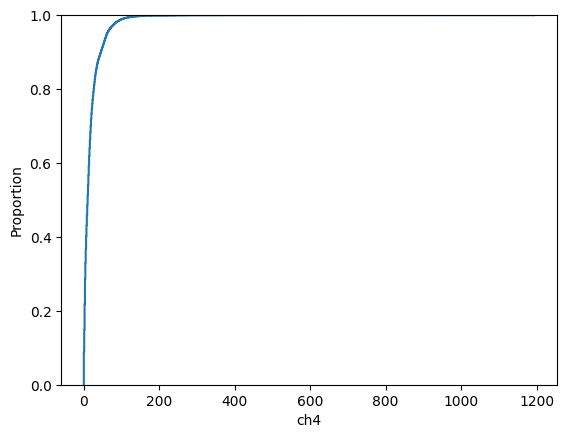

In [66]:
sns.ecdfplot(data=normalDf['ch4'])

<Axes: xlabel='ch4', ylabel='Proportion'>

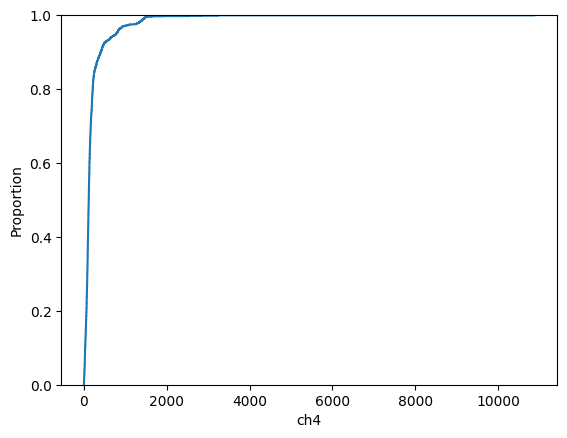

In [67]:
sns.ecdfplot(data=faultyDf['ch4'])

<Axes: xlabel='c2h2', ylabel='Proportion'>

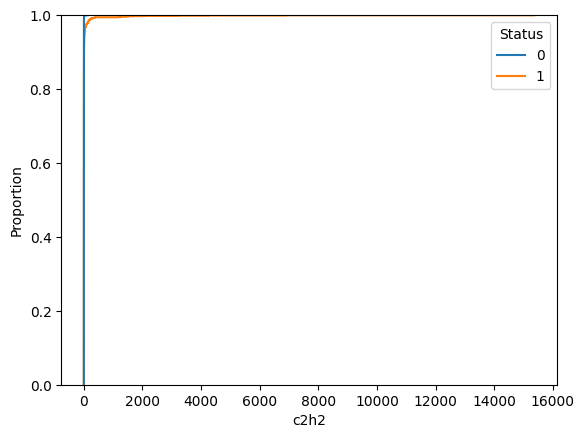

In [68]:
sns.ecdfplot(data=df, x="c2h2", hue="Status")

In [71]:
newFeatures = list(pvalueDict.keys())
newFeatures = newFeatures[:15]
thresholdsDict = {}
for feature in newFeatures:
    result = stats.ks_2samp(normalDf[feature], faultyDf[feature])
    thresholdsDict[feature] = result.statistic_location
display(thresholdsDict)

{'ch4': 42.01,
 'c2h4': 4.01,
 'c2h6': 5.01,
 'c2h2/(c2h4 + c2h6 + c2h2)': 9.801038910124472e-05,
 'ch4/(ch4 + c2h4 + c2h6)': 0.46917499881533425,
 'c2h6/c2h2': 7201.0,
 'c2h2/c2h6': 0.00013696753869332968,
 'c2h2/(ch4 + c2h4 + c2h2)': 0.00015377518068583726,
 'c2h4/c2h2': 101.65573373170236,
 'c2h2/c2h4': 0.009738442239590195,
 'co2': 4251.0,
 'ch4/c2h2': 5801.0,
 'c2h2/ch4': 0.00016946280291476023,
 'h2': 32.01,
 'c2h2/(ch4 + c2h6 + c2h2)': 0.00010413412475268144}